In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:

# Define the path to the data directory
data_path = 'C:/Users/Yibabe/Desktop/kifiyaweek1/data/'

# The first stock CSV file name
first_stock_file = 'AMZN_historical_data.csv'

# Read the first stock data file
first_stock_data = pd.read_csv(data_path + first_stock_file)

# Print column names to verify and adjust as needed
print("Stock Data Columns:", first_stock_data.columns)

# Assuming the actual date column name in the stock data is 'Date' (change this if needed)
stock_date_column = 'Date'

# Convert stock price timestamps to datetime and set to UTC (or appropriate time zone)
first_stock_data[stock_date_column] = pd.to_datetime(first_stock_data[stock_date_column]).dt.tz_localize('UTC')

Stock Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [5]:
first_stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00+00:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00+00:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00+00:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00+00:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00+00:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24 00:00:00+00:00,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25 00:00:00+00:00,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26 00:00:00+00:00,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29 00:00:00+00:00,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [11]:
 # Read financial news CSV file
news_data_path = 'C:/Users/Yibabe/Desktop/kifiyaweek1/data/processed_analyst_ratings.csv'
news_data = pd.read_csv(news_data_path)

#Print column names to verify and adjust as needed
print("News Data Columns:", news_data.columns)

#Check if 'Date' is in news_data columns
if 'Date' in news_data.columns:#
    news_date_column = 'Date'
elif 'date' in news_data.columns:
    news_date_column = 'date'
else:
    #If the date column is named something else, replace 'date' with the correct column name
    raise KeyError("The financial news data does not contain a 'Date' or 'date' column. Please check the CSV file.")



News Data Columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'day_of_week'],
      dtype='object')


In [12]:
# Convert financial news timestamps to datetime
news_data[news_date_column] = pd.to_datetime(news_data[news_date_column])
# Check if the date column is timezone-aware
if news_data[news_date_column].dt.tz is None:
    # If not timezone-aware, localize to UTC
    news_data[news_date_column] = news_data[news_date_column].dt.tz_localize('UTC')
else:
    # If already timezone-aware, convert to UTC
    news_data[news_date_column] = news_data[news_date_column].dt.tz_convert('UTC')

In [29]:
news_data.shape

(1407328, 7)

In [14]:
#to merge the finanical news and the stock price data 
# Step 1: Clean Unnecessary Columns
df_news = news_data.drop(columns=['Unnamed: 0'])
# Step 2: Ensure 'Date' and 'date' columns are in the same datetime format
first_stock_data['Date'] = pd.to_datetime(first_stock_data['Date'])
df_news['date'] = pd.to_datetime(df_news['date'])
# Step 3: Merge DataFrames on the date column
merged_df = pd.merge(first_stock_data, df_news, left_on='Date', right_on='date', how='inner')
# Optional: Drop redundant columns after merging
merged_df = merged_df.drop(columns=['date'])
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,headline,url,publisher,stock,day_of_week
0,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,Monday
1,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,Monday
2,2009-04-29 00:00:00+00:00,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,Wednesday
3,2009-05-22 00:00:00+00:00,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,Friday
4,2009-05-27 00:00:00+00:00,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,EPS,Wednesday


In [15]:
merged_df.to_csv(r'C:\Users\Yibabe\Desktop\kifiyaweek1\data\merged\AMZN_merged_data.csv', index=False)


In [16]:
from textblob import TextBlob
import nltk
nltk.download('punkt')  # Download the necessary tokenizer models for nltk

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
# loading a DataFrame
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\kifiyaweek1\data\merged\AMZN_merged_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,headline,url,publisher,stock,day_of_week
0,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,Monday
1,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,Monday
2,2009-04-29 00:00:00+00:00,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,Wednesday
3,2009-05-22 00:00:00+00:00,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,Friday
4,2009-05-27 00:00:00+00:00,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,EPS,Wednesday


In [18]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Return polarity and subjectivity
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity


In [19]:
# Apply sentiment analysis to each headline
df[['polarity', 'subjectivity']] = df['headline'].apply(lambda x: pd.Series(analyze_sentiment(x)))


In [20]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization to the DataFrame
df['sentiment'] = df['polarity'].apply(categorize_sentiment)


In [28]:
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,headline,url,publisher,stock,day_of_week,polarity,subjectivity,sentiment
0,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,Monday,0.000000,0.000000,neutral
1,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,Monday,0.000000,0.000000,neutral
2,2009-04-29 00:00:00+00:00,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,Wednesday,0.000000,0.000000,neutral
3,2009-05-22 00:00:00+00:00,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,Friday,0.000000,0.000000,neutral
4,2009-05-27 00:00:00+00:00,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,EPS,Wednesday,0.268182,0.427273,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009-07-27 00:00:00+00:00,4.3120,4.3245,4.1780,4.2120,4.2120,225586000,0.0,0.0,The Ayers Group Offers Platinum Services for C...,https://www.benzinga.com/09/07/85/the-ayers-gr...,Benzinga Staff,KELYA,Monday,0.100000,0.000000,positive
96,2009-07-27 00:00:00+00:00,4.3120,4.3245,4.1780,4.2120,4.2120,225586000,0.0,0.0,"Virgin Mobile USA Asks Music Fans to ""Book the...",https://www.benzinga.com/09/07/272/virgin-mobi...,Benzinga Staff,KYO,Monday,0.000000,0.000000,neutral
97,2009-07-27 00:00:00+00:00,4.3120,4.3245,4.1780,4.2120,4.2120,225586000,0.0,0.0,Lakeland Industries to Present at Jesup & Lamo...,https://www.benzinga.com/09/07/220/lakeland-in...,Benzinga Staff,LAKE,Monday,0.000000,0.000000,neutral
98,2009-07-27 00:00:00+00:00,4.3120,4.3245,4.1780,4.2120,4.2120,225586000,0.0,0.0,Limelight Networks(R) Introduces New Mobility ...,https://www.benzinga.com/09/07/263/limelight-n...,Benzinga Staff,LLNW,Monday,0.136364,0.454545,positive


In [23]:
# Save the DataFrame to a new CSV file
df.to_csv(r'C:\Users\Yibabe\Desktop\kifiyaweek1\data\merged\AMZN_news_with_sentiment.csv', index=False)


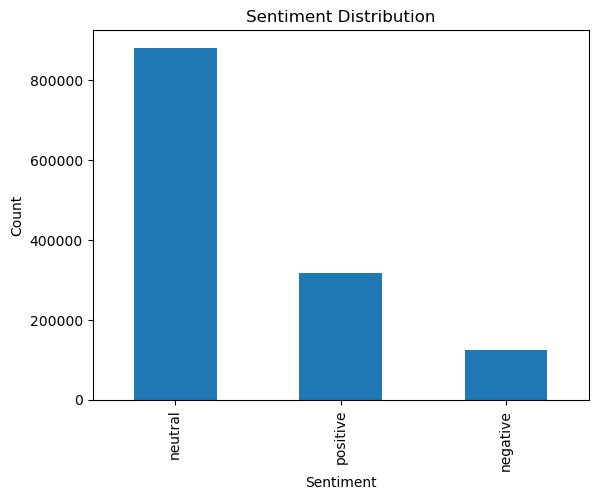

In [24]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
